In [ ]:
# classes
# These are the two values that are more weird -df.sort_values(by='Quantity', ascending=False).head(2)

# with nlp find category of items?
# clustr clients to wholesale and retail?

# Importing libraries and dataset

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import cleaning 

In [2]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

**Dataset**:

Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

In [3]:
file_path = '../data/Online Retail.xlsx'
df = pd.read_excel(file_path)

# Initial Exploration

In [132]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Missing values

**Notes for cleaning:**

- To drop rows with NaN at Description AND at CustomerID
- Drop rows with Price 0.0

**Then I will be left with NaN at CustomerID -> 132605 NaN values**

In [36]:
#  Missing values
df.isna().sum()

InvoiceNo           0
StockCode         317
Description       317
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132183
Country             0
dtype: int64

In [37]:
df.loc[df.Description.isna()] # 1454 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,NaN,NaN,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,NaN,NaN,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
5684,536865,NaN,NaN,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,NaN,NaN,2,2010-12-03 14:26:00,0.85,14723,United Kingdom
7976,537077,NaN,NaN,12,2010-12-05 11:59:00,0.42,17062,United Kingdom
...,...,...,...,...,...,...,...,...
526015,580645,NaN,NaN,1,2011-12-05 13:11:00,219.50,17857,United Kingdom
526018,580646,NaN,NaN,800,2011-12-05 13:13:00,0.25,17857,United Kingdom
530876,580884,NaN,NaN,1,2011-12-06 12:21:00,0.85,15907,United Kingdom
531432,580956,NaN,NaN,4,2011-12-06 14:23:00,1.25,17841,United Kingdom


In [38]:
df[df.Description.isna() & df.CustomerID.isna()] # 1454 row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5684,536865,NaN,NaN,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
14392,537534,NaN,NaN,1,2010-12-07 11:48:00,924.59,NaN,United Kingdom
37317,539457,NaN,NaN,2,2010-12-17 17:24:00,1.00,NaN,United Kingdom
39544,539651,NaN,NaN,1,2010-12-20 16:19:00,22.00,NaN,United Kingdom
40383,539736,NaN,NaN,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom
41448,539856,NaN,NaN,1,2010-12-22 14:41:00,1298.40,NaN,United Kingdom
57180,541133,NaN,NaN,1,2011-01-14 10:17:00,2.50,NaN,United Kingdom
104275,545160,NaN,NaN,1,2011-02-28 13:31:00,48.00,NaN,United Kingdom
104400,545176,NaN,NaN,1,2011-02-28 14:19:00,764.12,NaN,United Kingdom
119632,546558,NaN,NaN,1,2011-03-15 09:50:00,2583.76,NaN,Hong Kong


In [39]:
df[df.UnitPrice == 0.0] # will drop these rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## Duplicated values

**Notes for cleaning:**

- Drop duplicated rows

In [40]:
df.duplicated().sum() # Duplicated rows

0

## Dtypes

Types of columns appear to be correct.

In [41]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

## Outliers & Negative values

**Notes for cleaning:**

- There seem to be outliers in columns 'Quantity' and 'UnitPrice'. To check them and if appropriate to remove them with statistical methods (?)

**Notes:**

- Something weird with UnitPrice '-11062.06', bad debt
- Stockcode with 1 word ['M', 'D', 'S', 'B', 'm']
- if InvoiceNo code starts with letter 'c', it indicates a cancellation - TO BE DROPPED



*TO BE EXPLORED outliers at Quantity and Unit Price*

<Axes: ylabel='Quantity'>

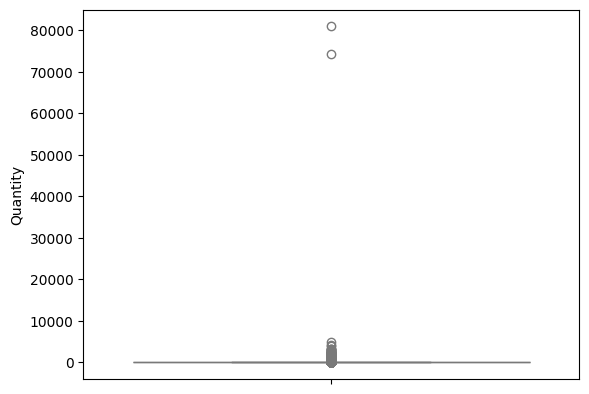

In [121]:
sns.boxplot(data = df['Quantity'], color="lightblue") # there are outliers

<Axes: ylabel='UnitPrice'>

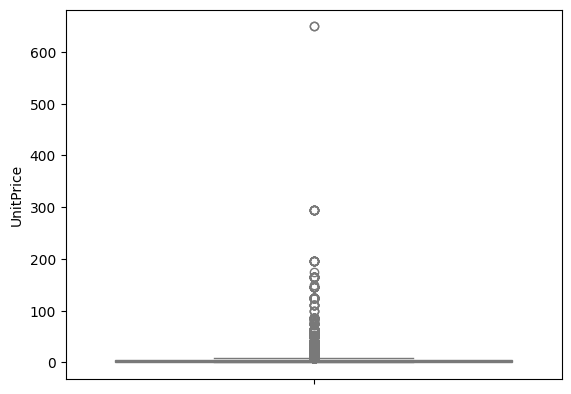

In [128]:
sns.boxplot(data = df['UnitPrice'], color="lightblue") # there are outliers

In [131]:
# These are tthe two values that are more weird
df.sort_values(by='Quantity', ascending=False).head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom


In [129]:
df.select_dtypes('number').describe()

,Quantity,UnitPrice
count,522724.000000,522724.000000
mean,10.639599,3.287860
std,156.566664,4.464766
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,80995.000000,649.500000


In [115]:
df[df.InvoiceNo == 567507].UnitPrice.sum()

2192.5100000000007

In [118]:
df[(df.InvoiceNo == 567507) & (df.StockCode =='SHIPPING')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
349412,567507,SHIPPING,SHIPPING,1,2011-09-20 14:46:00,1092.21,NaN,United Kingdom


In [126]:
# it looks that th 60 top unit prices are either Shipping or NaN
# I will drop the NaN (they are from the MANUAL code) because they don't offer any clear insights
df.sort_values(by='UnitPrice', ascending=False).head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145,United Kingdom
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.0,14842,United Kingdom
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015,United Kingdom
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406,United Kingdom
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.0,16607,United Kingdom
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.0,14973,United Kingdom
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452,United Kingdom
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.0,13452,United Kingdom


In [127]:
df.sort_values(by='Quantity', ascending=False).head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308,United Kingdom
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06:00,1.45,12931,United Kingdom


In [79]:
# I see that there are also the shipping costs with SrockCode 'POST' and 'DOT'
df[df.Description.str.contains('POSTAGE', na=False)].head(30)
# For clarity I will replace the code and description with shipping

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [80]:
df[df.Description.str.contains('POSTAGE', na=False)].StockCode.value_counts()

Series([], Name: count, dtype: int64)

In [98]:
# There are two entries with amazon fee, and these invoices contain only that item
# Will drop them 
df[df.Description.str.contains('AMAZON', na=False)].head(30)
# df[df.InvoiceNo == 537632]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [44]:
df[(df.Quantity<0)] # 10624 rows, THESE ARE CANCELLATIONS

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [47]:
df[(df.Quantity<0) & df.InvoiceNo.str.startswith('C')] # cancellations

AttributeError: Can only use .str accessor with string values!

In [17]:
df[(df.Quantity<0) & (~df.InvoiceNo.astype(str).str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [56]:
df[(df.Quantity<0) & (~df.InvoiceNo.astype(str).str.startswith('C'))].Quantity.describe()
# I see from this, that what has the above conditions, has negative Quantity

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Quantity, dtype: float64

In [19]:
df[df.InvoiceNo == '581568']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
df[df.CustomerID == 17548.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom


In [21]:
df[df.CustomerID == 17315.0].tail(10) 
# okay, from this I understand that the cancelled items appear only to the line with orders starting with C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
537792,581345,72800B,4 PURPLE FLOCK DINNER CANDLES,12,2011-12-08 12:15:00,0.79,17315.0,United Kingdom
537793,581345,22488,NATURAL SLATE RECTANGLE CHALKBOARD,6,2011-12-08 12:15:00,1.65,17315.0,United Kingdom
537794,581345,85059,FRENCH ENAMEL WATER BASIN,2,2011-12-08 12:15:00,3.75,17315.0,United Kingdom
537795,581345,22495,SET OF 2 ROUND TINS CAMEMBERT,2,2011-12-08 12:15:00,0.79,17315.0,United Kingdom
537796,581345,22500,SET OF 2 TINS JARDIN DE PROVENCE,2,2011-12-08 12:15:00,1.25,17315.0,United Kingdom
537797,581345,22151,PLACE SETTING WHITE HEART,24,2011-12-08 12:15:00,0.42,17315.0,United Kingdom
537798,581345,22698,PINK REGENCY TEACUP AND SAUCER,9,2011-12-08 12:15:00,2.95,17315.0,United Kingdom
537799,581345,22699,ROSES REGENCY TEACUP AND SAUCER,10,2011-12-08 12:15:00,2.95,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [48]:
df[(df.UnitPrice<0)] # negative price is adjusted bad debt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [49]:
df[(df.InvoiceNo == 'A563186')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [50]:
df[(df.UnitPrice == 11062.06)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [51]:
df[df.StockCode.str.len() == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [26]:
df[df.StockCode.str.len() == 1].StockCode.value_counts().index # I need to look into that

Index(['M', 'D', 'S', 'B', 'm'], dtype='object', name='StockCode')

In [27]:
df[df.StockCode == 'S'] # 'SAMPLES'
df[df.StockCode == 'M'] # 'Manual'
df[df.StockCode == 'D'] # 'Discount'
df[df.StockCode == 'B'] # 'Adjust bad debt'
df[df.StockCode == 'm'] # 'Manual'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom


In [52]:
df[df.StockCode == 'S'] # dropping them

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [53]:
df[df.StockCode == 'B'] # dropping them -> check outliers later

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [54]:
df[df.StockCode == 'M'].head(30) # here I will add to StockCode and Description NaN, to treat them as such
# same for df[df.StockCode == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [55]:
df[df.StockCode.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,NaN,NaN,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,NaN,NaN,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
5684,536865,NaN,NaN,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,NaN,NaN,2,2010-12-03 14:26:00,0.85,14723,United Kingdom
7976,537077,NaN,NaN,12,2010-12-05 11:59:00,0.42,17062,United Kingdom
...,...,...,...,...,...,...,...,...
526015,580645,NaN,NaN,1,2011-12-05 13:11:00,219.50,17857,United Kingdom
526018,580646,NaN,NaN,800,2011-12-05 13:13:00,0.25,17857,United Kingdom
530876,580884,NaN,NaN,1,2011-12-06 12:21:00,0.85,15907,United Kingdom
531432,580956,NaN,NaN,4,2011-12-06 14:23:00,1.25,17841,United Kingdom


## Formatting

**Notes for cleaning:**

- country EIRE refers to Ireland - to change

In [136]:
df[df.Country.str.contains('EIRE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [141]:
df.Country.nunique()

38

In [135]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [138]:
df[df.Country == 'European Community'].shape[0] # only connected to 1 client

57

In [140]:
df[df.Country == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2011-11-24 14:55:00,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-24 14:55:00,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-11-24 14:55:00,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-11-24 14:55:00,0.55,NaN,Unspecified


## Other

In [133]:
df.CustomerID.nunique()

4335

In [34]:
df.Description.value_counts().head(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: count, dtype: int64

In [150]:
df[df.Description == 'LUNCH BAG CARS BLUE'].StockCode.unique()

array([20728], dtype=object)

In [142]:
df.StockCode.nunique()

3915

In [144]:
df.Description.nunique()

4020

# Cleaning

In [125]:
df, df_ship = cleaning(df)